# Árvores de decisão e florestas aleatórias em Python

Este é o código aborda os métodos de árvores de decisões em Python. 

## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn

warn.filterwarnings('ignore')

## Obtendo os dados

In [2]:
# https://www.news-medical.net/health/What-is-Kyphosis-(Portuguese).aspx

#Kyphosis  indica se o método foi eficiente ou não
# Age Idade
# Number Número de vértebras que a criança teve intervenção
# Start Vértebra inicial que o procedimento foi inicial

df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## Análisa Exploratória de Dados

Vamos observar um simples pairplot para este pequeno conjunto de dados.

In [ ]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Divisão treino-teste

Vamos dividir os dados em um conjunto de treinamento e um conjunto de testes!

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

## Árvores de decisão

Começaremos apenas treinando uma única árvore de decisão.

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dtree = DecisionTreeClassifier()

In [9]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Previsão e Avaliação

Vamos avaliar a nossa árvore de decisão.

In [10]:
predictions = dtree.predict(X_test)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

In [12]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.89      0.81      0.85        21
     present       0.33      0.50      0.40         4

    accuracy                           0.76        25
   macro avg       0.61      0.65      0.62        25
weighted avg       0.80      0.76      0.78        25



In [13]:
print(confusion_matrix(y_test,predictions))

[[17  4]
 [ 2  2]]


In [15]:
# Features importantes obtidas por árvore de decisão
colunas_importantes = pd.DataFrame(dtree.feature_importances_.reshape(1,3), columns=X_train.columns)

print('percentual total ',np.sum(dtree.feature_importances_))
colunas_importantes.head()

print(np.max(colunas_importantes))


percentual total  1.0
0.5822626985417683


Text(0.5, 1.0, 'Importância de cada feature')

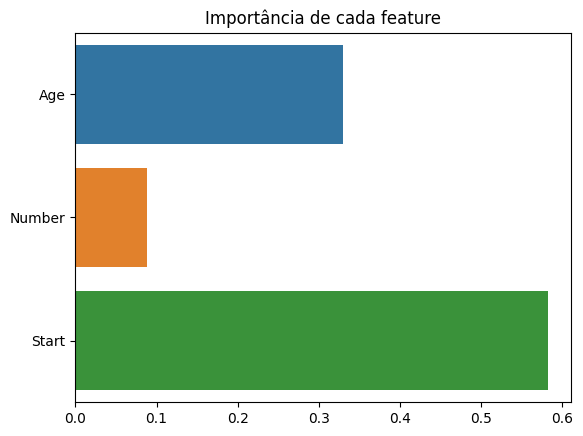

In [16]:
colunas_importantes = pd.Series(data=dtree.feature_importances_, index=X_train.columns)
sns.barplot(x=colunas_importantes, y=colunas_importantes.index, orient='h').set_title('Importância de cada feature')

## Visualização de árvore

O Scikit learn possui alguns recursos de visualização incorporados para árvores de decisão. Você não usará isso com freqüência e requer que você instale a biblioteca pydot, mas aqui está um exemplo do código para executar isso:

In [1]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

features = list(df.columns[1:])
features

ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
dot_data = export_graphviz(dtree, out_file=None,feature_names=features,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Florestas aleatórias

Agora vamos comparar o modelo da árvore de decisão com uma floresta aleatória.

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
# Features importantes obtidas por random forest
colunas_importantes = pd.DataFrame(rfc.feature_importances_.reshape(1,3), columns=X_train.columns)

print(np.max(colunas_importantes))

colunas_importantes.head()

0.38692493605051204


,Age,Number,Start
0,0.353284,0.259791,0.386925


Text(0.5, 1.0, 'Importância de cada feature')

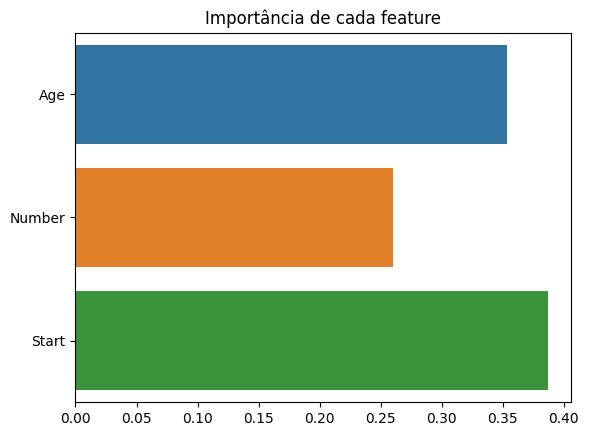

In [23]:
colunas_importantes = pd.Series(data=rfc.feature_importances_, index=X_train.columns)
sns.barplot(x=colunas_importantes, y=colunas_importantes.index, orient='h').set_title('Importância de cada feature')

In [26]:
rfc_pred = rfc.predict(X_test)

In [27]:
print(confusion_matrix(y_test,rfc_pred))

[[19  2]
 [ 1  3]]


In [28]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.95      0.90      0.93        21
     present       0.60      0.75      0.67         4

    accuracy                           0.88        25
   macro avg       0.77      0.83      0.80        25
weighted avg       0.89      0.88      0.89        25

